In [1]:
import pandas as pd
import numpy as np

# библиотека для построения графиков
import seaborn as sns
# библиотека с упрощенными графиками
import matplotlib.pyplot as plot

In [2]:
df = pd.read_csv("vgsales_4.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,435,Club Penguin: Elite Penguin Force,DS,2008.0,Adventure,Disney Interactive Studios,1.88,0.98,0.00,0.30,3.16
1,13444,Secret Files: Tunguska,PC,2006.0,Adventure,DreamCatcher Interactive,0.00,0.04,0.00,0.01,0.05
2,10126,ECW Anarchy Rulz,PS,1999.0,Fighting,Acclaim Entertainment,0.06,0.04,0.00,0.01,0.11
3,7585,Taiko no Tatsujin: Waku Waku Anime Matsuri,PS2,2003.0,Misc,Namco Bandai Games,0.00,0.00,0.20,0.00,0.20
4,10242,Breakout,PS,1999.0,Puzzle,Hasbro Interactive,0.06,0.04,0.00,0.01,0.11
...,...,...,...,...,...,...,...,...,...,...,...
548,11703,Genkai Totsuki Moero Chronicle,PSV,2014.0,Role-Playing,Compile Heart,0.00,0.00,0.08,0.00,0.08
549,13732,GoGo's Crazy Bones,DS,2012.0,Action,GameMill Entertainment,0.00,0.04,0.00,0.00,0.04
550,701,Yokai Watch Busters,3DS,2015.0,Action,Level 5,0.00,0.00,2.28,0.00,2.28
551,12849,Princess on Ice,DS,2008.0,Sports,505 Games,0.04,0.01,0.00,0.00,0.05


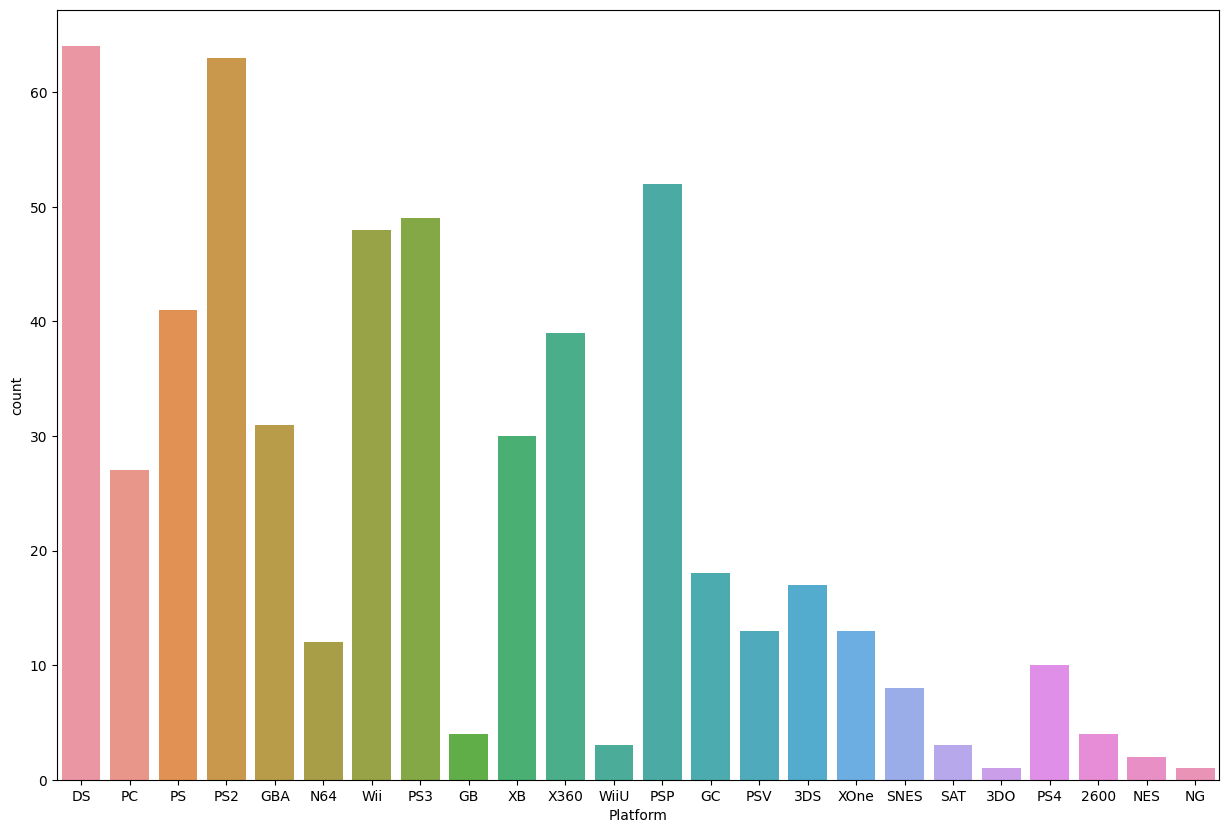

In [3]:
graph = sns.countplot(x="Platform", data = df)
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

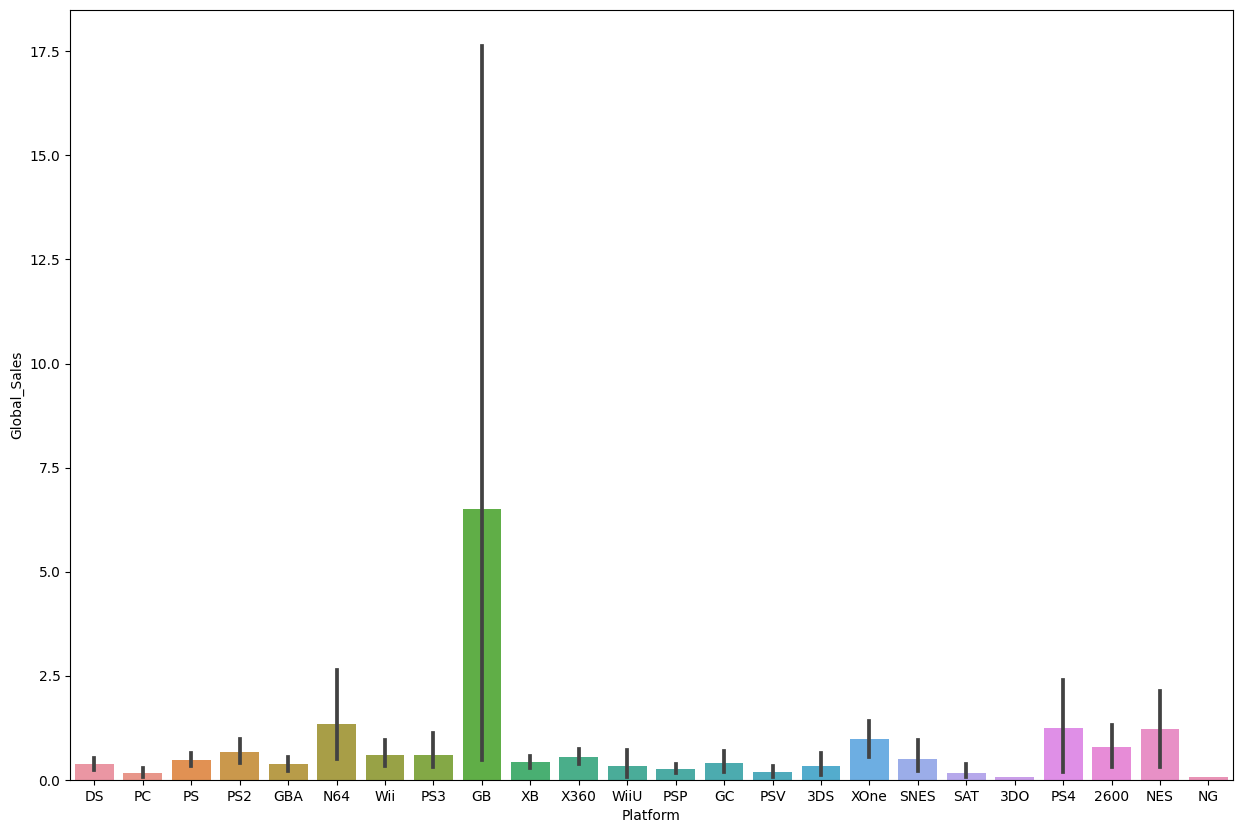

In [4]:
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

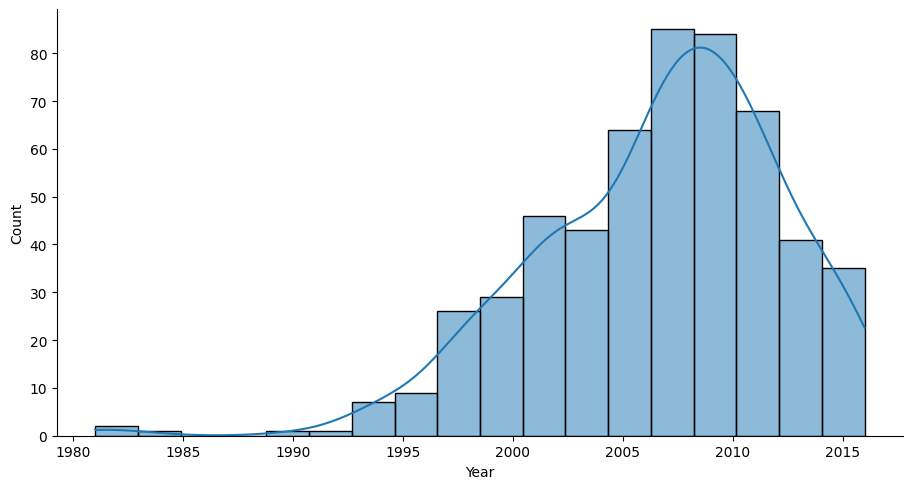

In [5]:
graph = sns.displot(df["Year"], kde = True) 
# kind = "kde", kind = True - аргумент, позволяющий построить отдельный график оценки плотности ядра или 
# kde рисуется в виде линии поверх гистограммы и часто повторяет форму её форму, 
# но дает больше информации о характере распределения.
graph.figure.set_figwidth(10)
graph.figure.set_figheight(5)

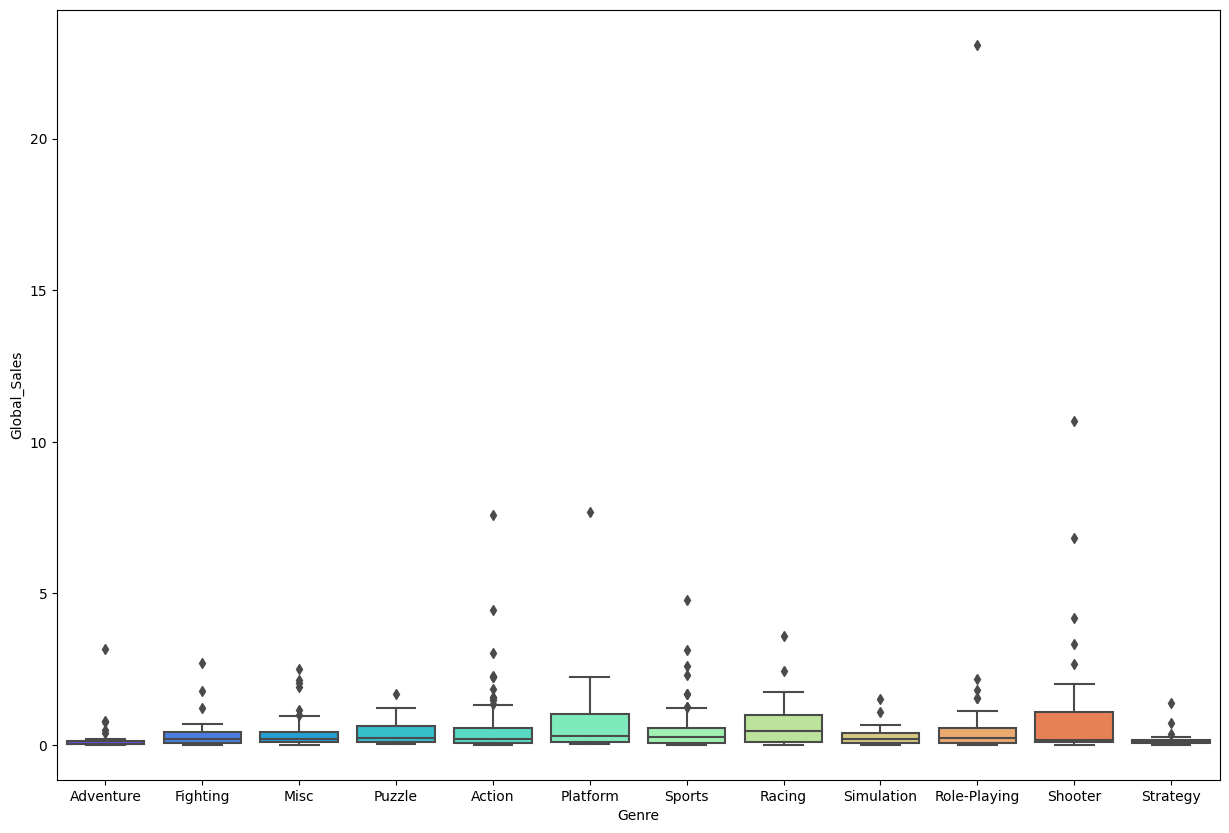

In [6]:
graph = sns.boxplot(x="Genre", y="Global_Sales",data = df,palette='rainbow')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

In [7]:
MyHeatMap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) #аргумент annot=True отображает коэффициент корреляции
MyHeatMap.figure.set_figwidth(10)
MyHeatMap.figure.set_figheight(5) 

ValueError: could not convert string to float: 'Club Penguin: Elite Penguin Force'

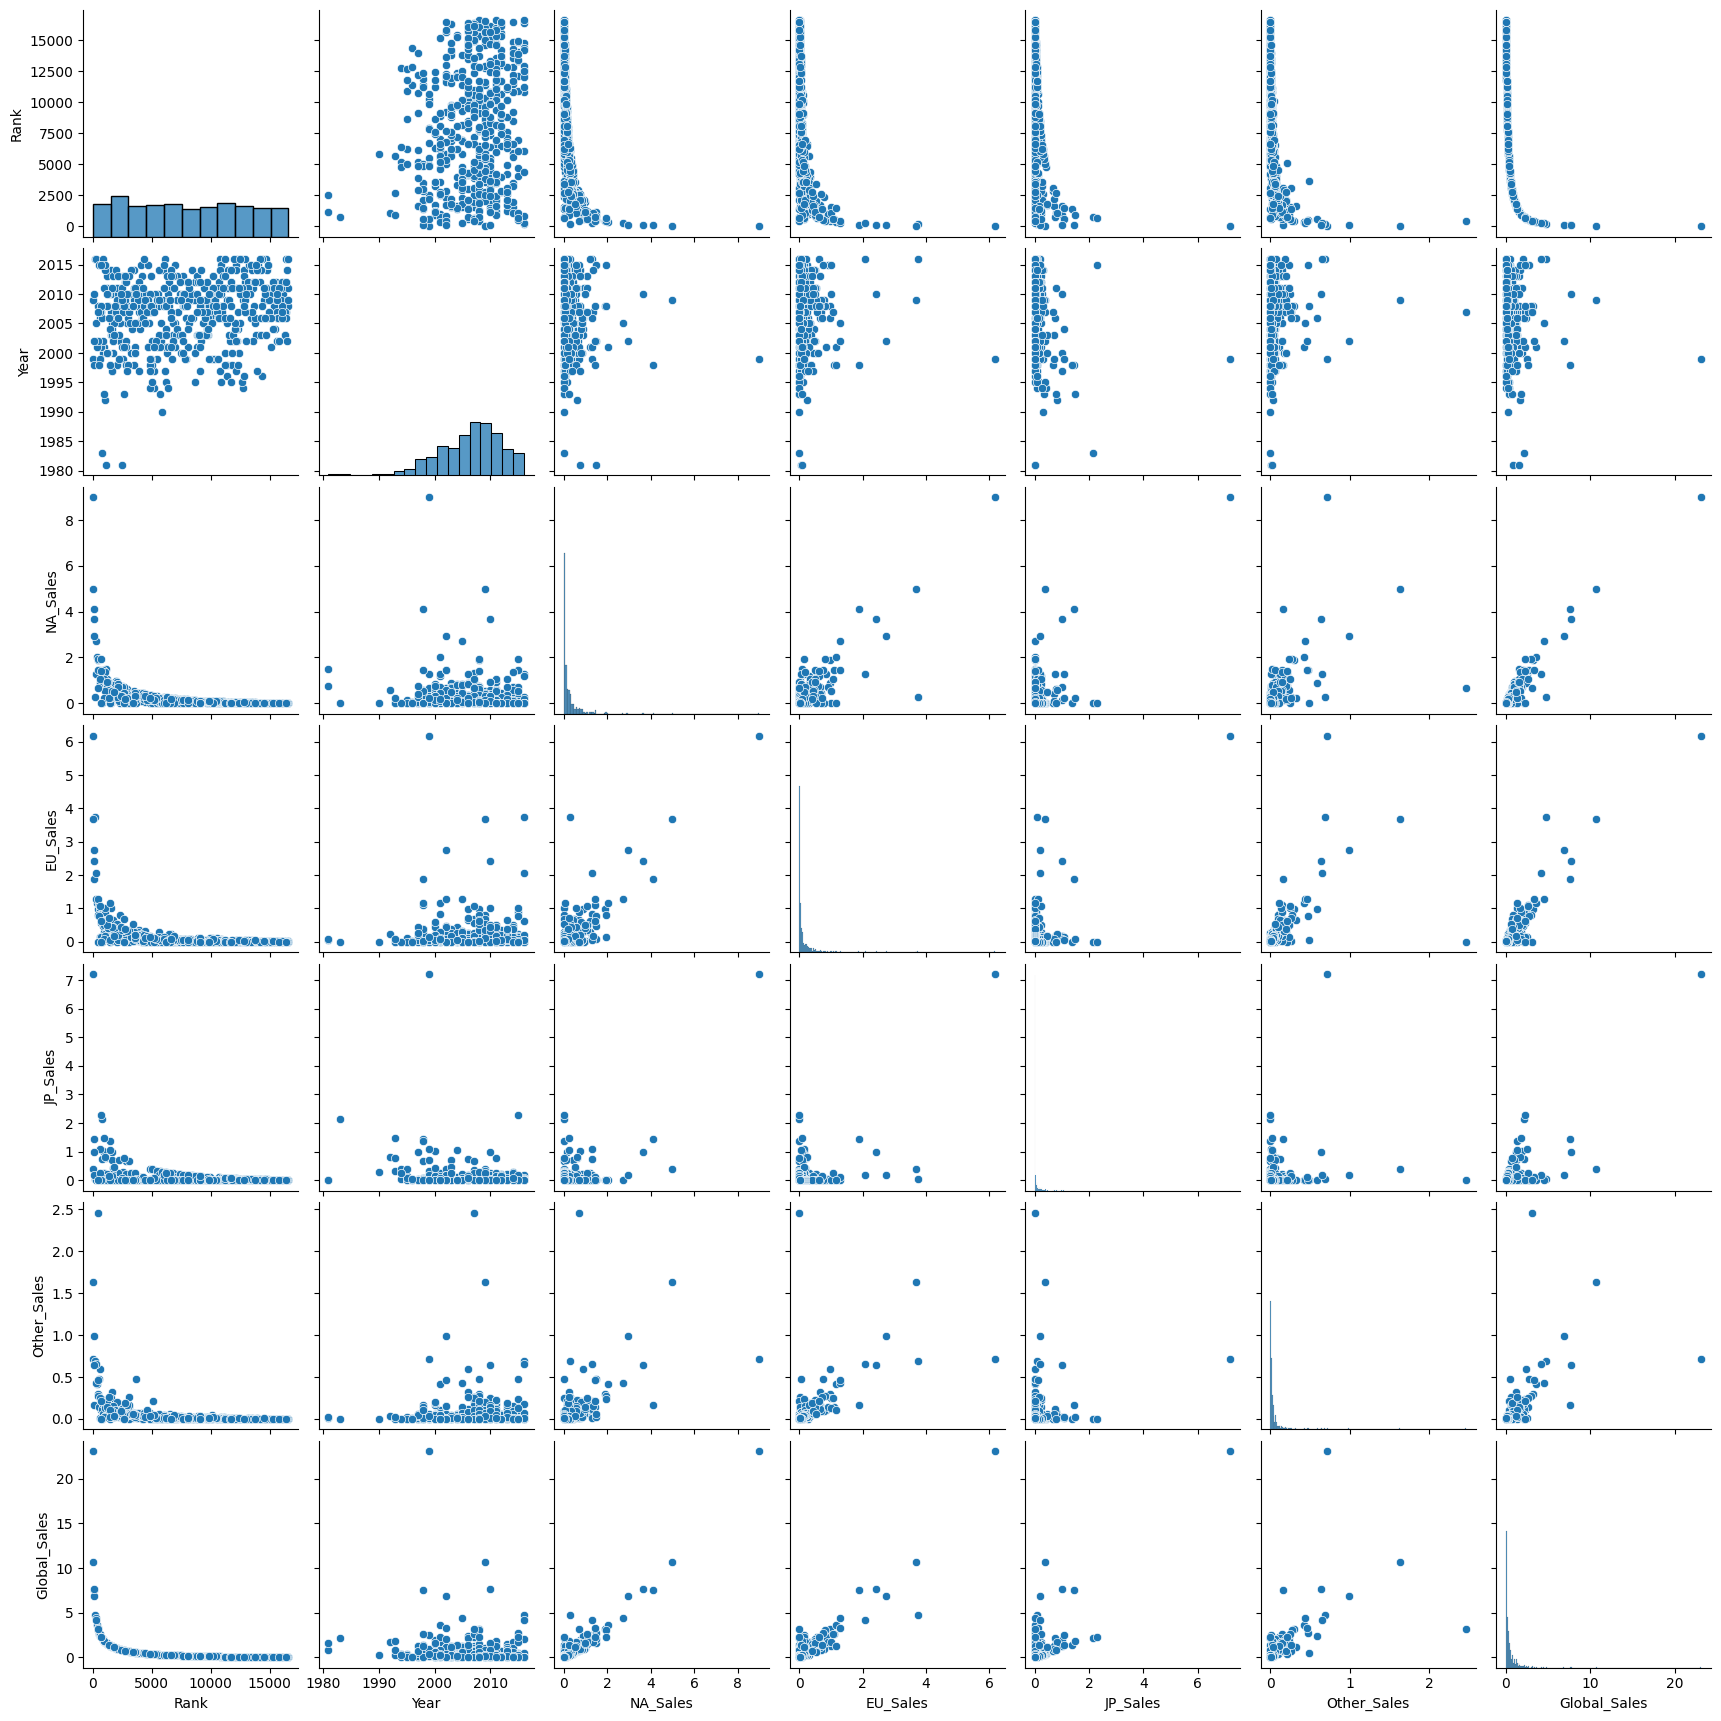

In [8]:
graph = sns.pairplot(df)

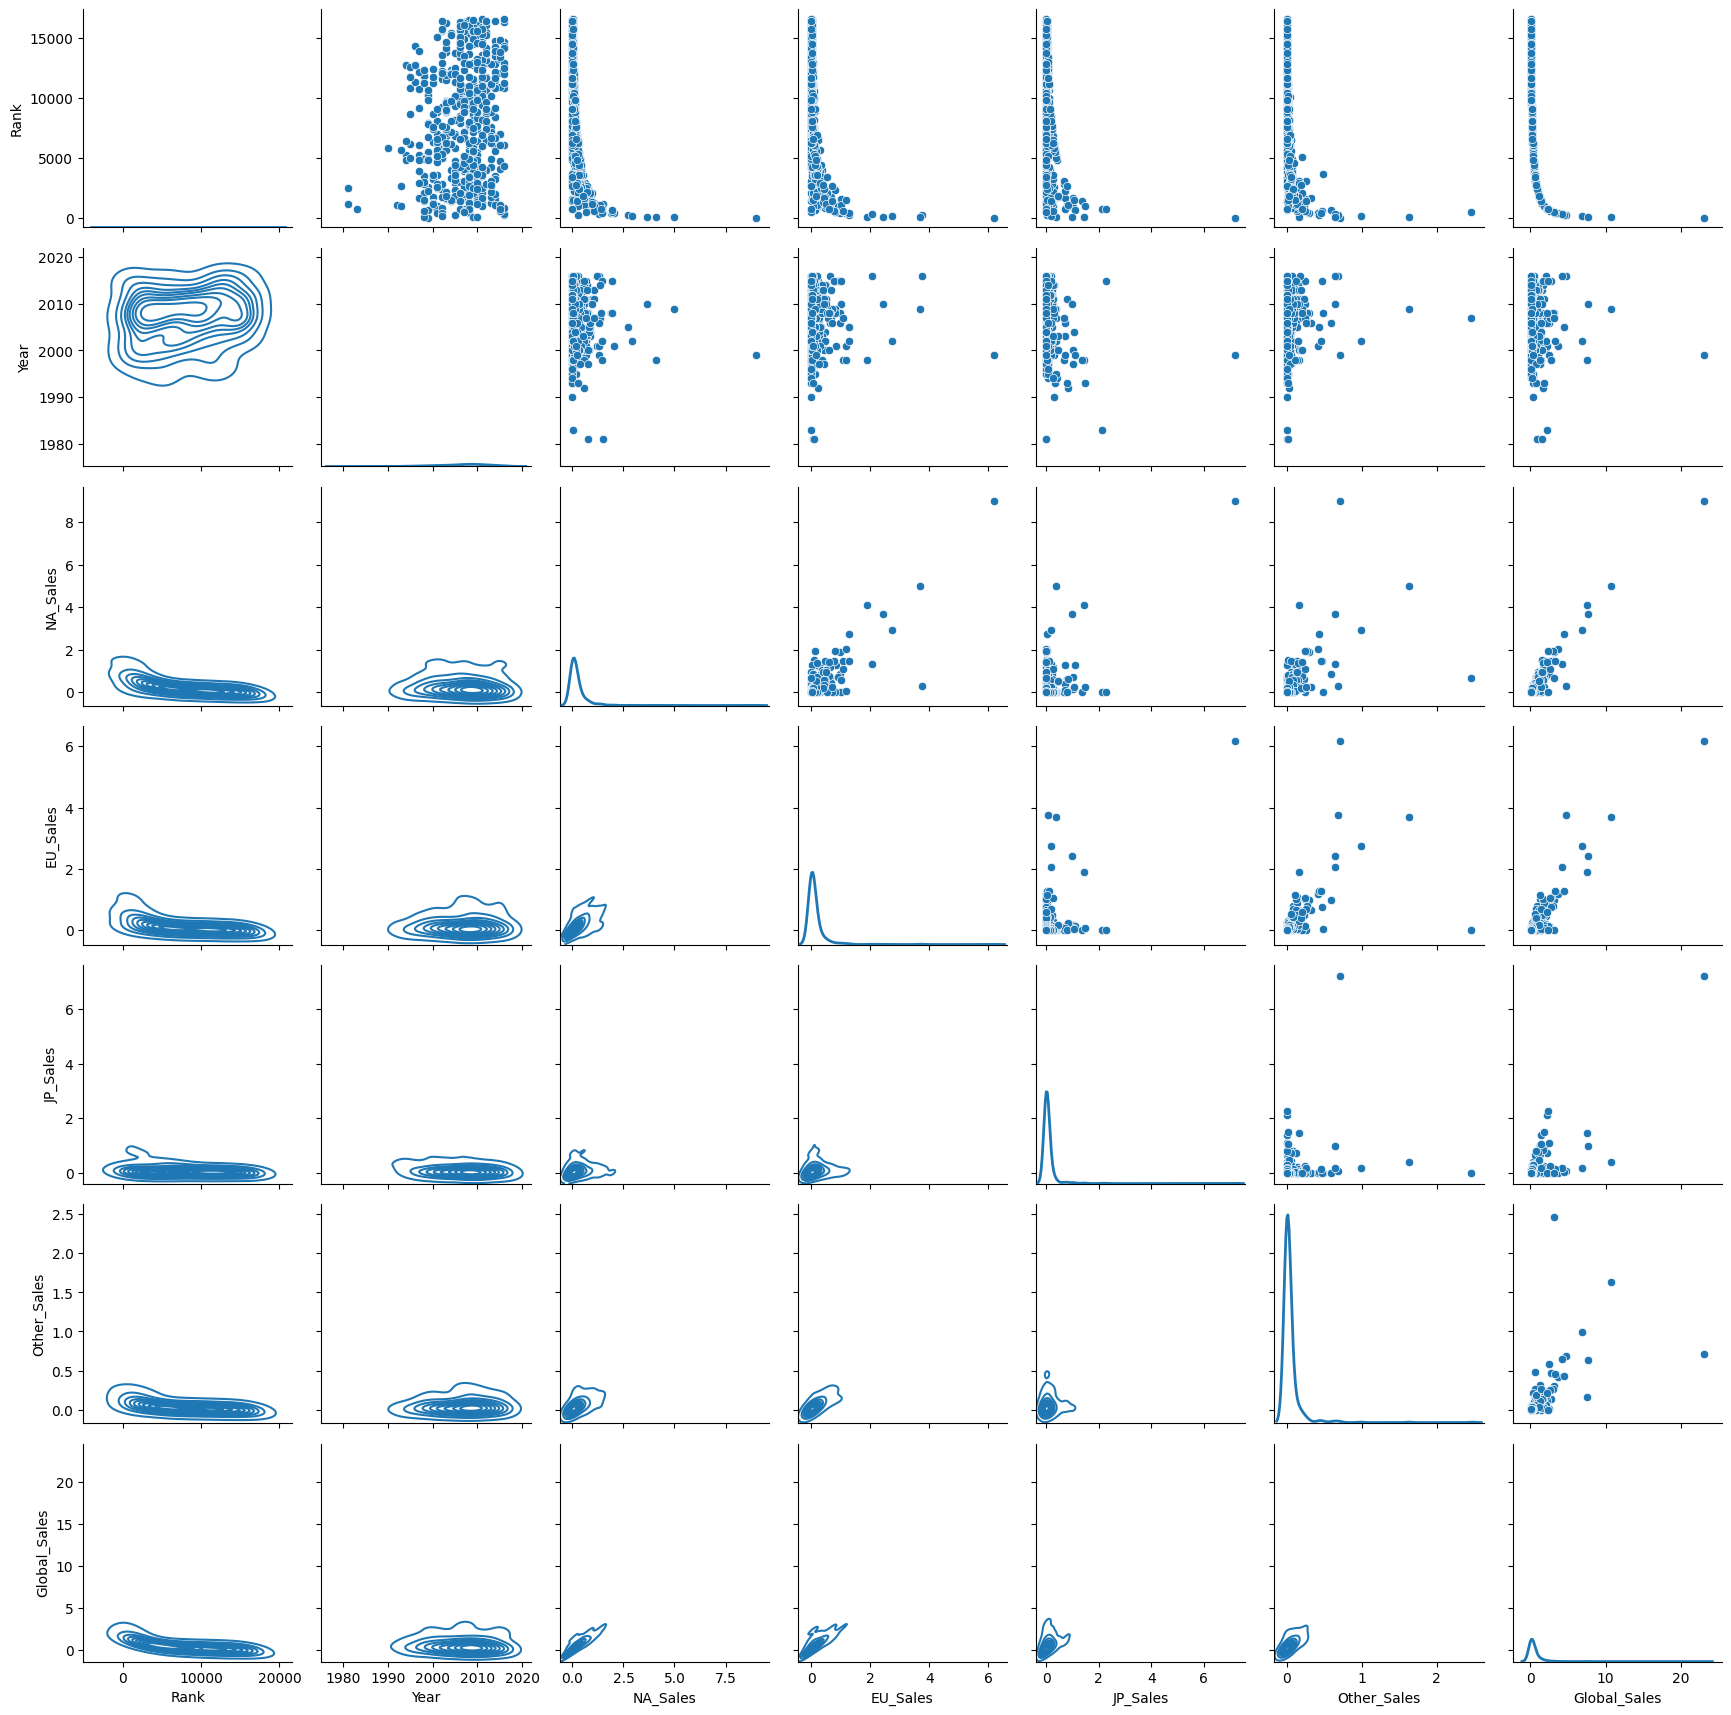

In [9]:
graph = sns.PairGrid(df)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)

In [10]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::50]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,1.88,0.98,0.00
50,1.19,0.29,0.24
100,0.11,0.00,0.00
150,0.00,0.00,0.05
200,0.03,0.01,0.00
250,0.08,0.02,0.00
300,0.37,0.25,0.00
350,0.12,0.05,0.00
400,0.09,0.07,0.00
450,0.26,0.19,0.22


In [11]:
#Кластеризация

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(df_mini)

all_predictions = model.predict(df_mini)

df_mini["KMeans"] = all_predictions

df_mini

c:\Users\alert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,JP_Sales,KMeans
0,1.88,0.98,0.00,2
50,1.19,0.29,0.24,2
100,0.11,0.00,0.00,1
150,0.00,0.00,0.05,1
200,0.03,0.01,0.00,1
250,0.08,0.02,0.00,1
300,0.37,0.25,0.00,1
350,0.12,0.05,0.00,1
400,0.09,0.07,0.00,1
450,0.26,0.19,0.22,1


<Axes: xlabel='count', ylabel='KMeans'>

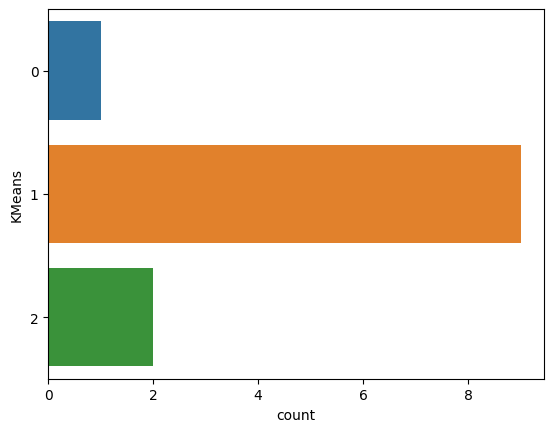

In [12]:
sns.countplot(data = df_mini, y = "KMeans")

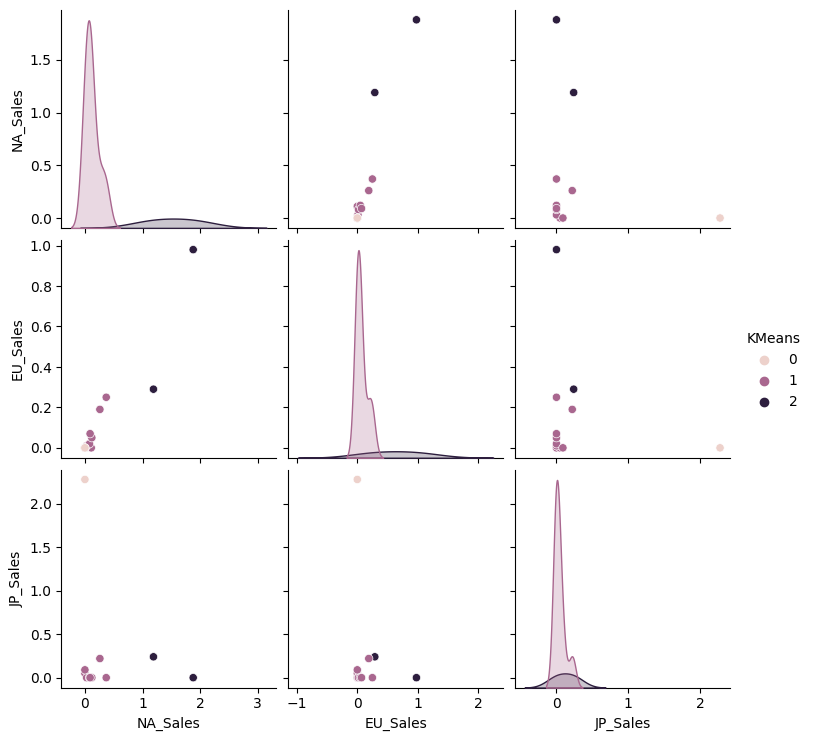

In [13]:
sns.pairplot(df_mini,hue="KMeans")

In [14]:
#Переназначение набора данных без столбца предсказаний KMeans

df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::1]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,1.88,0.98,0.00
1,0.00,0.04,0.00
2,0.06,0.04,0.00
3,0.00,0.00,0.20
4,0.06,0.04,0.00
...,...,...,...
548,0.00,0.00,0.08
549,0.00,0.04,0.00
550,0.00,0.00,2.28
551,0.04,0.01,0.00


In [15]:
#DBSCAN - более продвинутая версия KMeans
from sklearn.cluster import DBSCAN

model = DBSCAN()

model.fit(df_mini)

df_mini["DBSCAN"] = model.labels_

df_mini

,NA_Sales,EU_Sales,JP_Sales,DBSCAN
0,1.88,0.98,0.00,0
1,0.00,0.04,0.00,0
2,0.06,0.04,0.00,0
3,0.00,0.00,0.20,0
4,0.06,0.04,0.00,0
...,...,...,...,...
548,0.00,0.00,0.08,0
549,0.00,0.04,0.00,0
550,0.00,0.00,2.28,-1
551,0.04,0.01,0.00,0


<Axes: xlabel='count', ylabel='DBSCAN'>

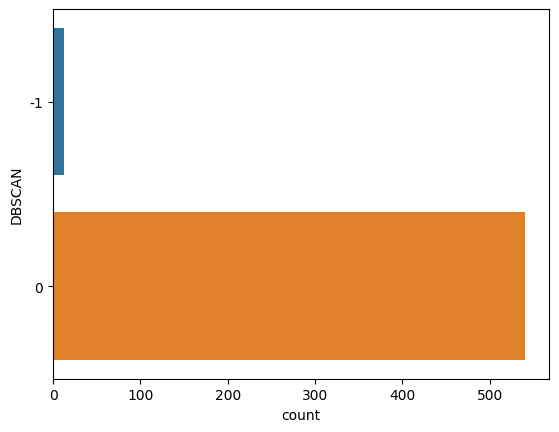

In [16]:
sns.countplot(data = df_mini, y = "DBSCAN")

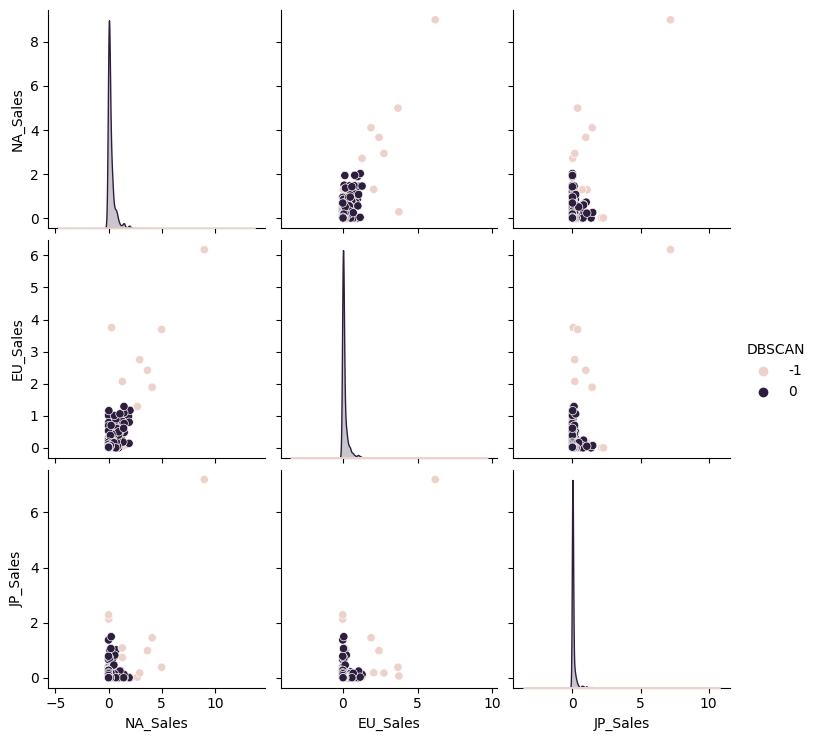

In [17]:
sns.pairplot(df_mini[::1],hue="DBSCAN")